In [161]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [163]:
# Задание 1

# Контрльные точки
p1 = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])

p2 = np.array([[0.0, 0.0], [3.5, 0], [2, 1.5], [4, 4]])

p3 = np.array([[10, 10], [15, 0], [2, 3], [0, 0.5]])


p4 = np.array([[0, 5], [5, 0], [2, 10], [0, 0.5]])

p5 = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
# Код для получения точек для написания их в word
# s_ = ''
# for idx, item in enumerate([p1, p2, p3, p4, p5]):
#     s_ += f"{idx+1}) "
#     for p in item:
#         s_ += f"{{{p[0]}, {p[1]}}}, "
#     s_ = s_[:-2] + '\n'
# print(s_)

In [164]:
def get_bezier_3(t: list, points) -> list:
    """
    Функция для получения 1 точки из кривой бизье
    """
    x = (
        (1 - t) ** 3 * points[0][0]
        + 3 * (1 - t) ** 2 * t * points[1][0]
        + 3 * (1 - t) * t**2 * points[2][0]
        + t**3 * points[3][0]
    )
    y = (
        (1 - t) ** 3 * points[0][1]
        + 3 * (1 - t) ** 2 * t * points[1][1]
        + 3 * (1 - t) * t**2 * points[2][1]
        + t**3 * points[3][1]
    )
    return [x, y]


def bezier_3(points, step: float = 0.01) -> list:
    """
    Кривая бизье 3 порядка
    @param points - массив контрольных точек
    @param step - шаг параметра t
    @return - массив точек, принадлежащий кривой бизье
    """
    to_return = []
    for t in np.arange(0, 1 + step, step):
        x = (
            (1 - t) ** 3 * points[0][0]
            + 3 * (1 - t) ** 2 * t * points[1][0]
            + 3 * (1 - t) * t**2 * points[2][0]
            + t**3 * points[3][0]
        )
        y = (
            (1 - t) ** 3 * points[0][1]
            + 3 * (1 - t) ** 2 * t * points[1][1]
            + 3 * (1 - t) * t**2 * points[2][1]
            + t**3 * points[3][1]
        )
        to_return.append([x, y])
    return np.array(to_return)


# get_bezier_3(0.2, p2)

In [165]:
def draw(points: list, save_name: str = None):
    """
    Генерация и отрисовка кривой бизье и её контрольных точек
    @param points - контрольные точки
    """
    fig = plt.figure()
    fig.set_size_inches(5, 5)
    x = points[:, 0]
    y = points[:, 1]
    plt.scatter(x, y, c="#00C19D")

    bezier = bezier_3(points)
    x = bezier[:, 0]
    y = bezier[:, 1]
    plt.plot(x, y, c="#6D2B6D")
    if save_name is not None:
        plt.savefig(save_name)

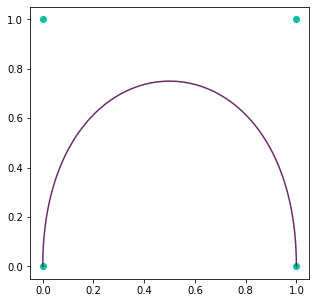

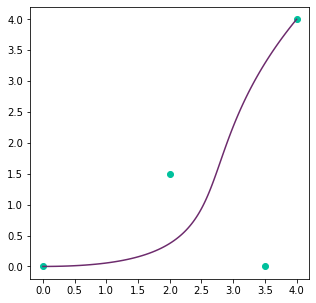

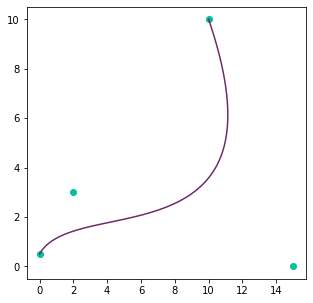

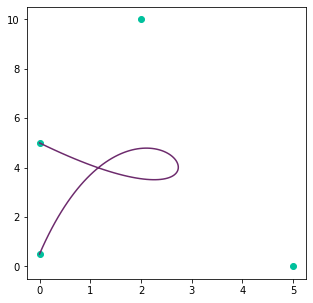

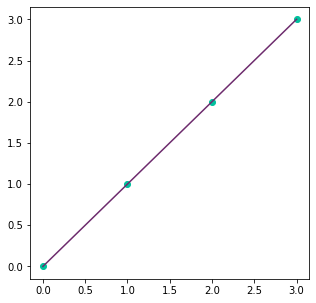

In [166]:
# Отрисовка и генерация кривых безье, 4 штуки.
draw(p1, "p1")
draw(p2, "p2")
draw(p3, "p3")
draw(p4, "p4")
draw(p5, "p5")

In [168]:
# Задание 2

outline = np.array(
    [
        [0, 0],
        [1, 1],
        [2, 2],
        [2, 0],
        [3, -2],
        [6, 9],
        [6, 6],
        [10, 10],
        [10, -10],
        [15, 0],
        [20, 10],
        [25, 15],
        [25, 20],
    ]
)

outline_smooth = np.array(
    [
        [0, 0],
        [1, 1],
        [2, 2],
        [2, 0],
        [2, -2],
        [4, 3],
        [6, 0],
        [8, -3],
        [10, -10],
        [15, 0],
    ]
)
# Код для получения точек для написания их в word
# s_ = ''
# for idx, item in enumerate([outline_smooth]):
#     s_ += f"{idx+1}) "
#     for p in item:
#         s_ += f"{{{p[0]}, {p[1]}}}, "
#     s_ = s_[:-2] + '\n'
# print(s_)

In [169]:
def outline_bezier(points: list):
    """
    Генерация точек кривых элементарных бизье
    """
    to_return = []
    for idx in range((len(points) // 4) + 1):
        tmp = list(points[idx * 3 : (idx + 1) * 3])
        tmp.append(points[(1 + idx) * 3])
        p = np.array(tmp)
        # draw(p)
        to_return.extend(list(bezier_3(p)))
    return np.array(to_return)


outline_bezier(outline);

In [170]:
def draw_outline_bezier(points: list, save_file: str = None):
    """
    Генерация и отрисовка кривой бизье и её контрольных точек
    @param points - контрольные точки
    """
    fig = plt.figure()
    fig.set_size_inches(7, 7)
    x = points[:, 0]
    y = points[:, 1]
    plt.scatter(x, y, c="#00C19D")

    outline_points = outline_bezier(points)
    x = outline_points[:, 0]
    y = outline_points[:, 1]
    plt.plot(x, y, c="#6D2B6D")
    if save_file is not None:
        plt.savefig(save_file)

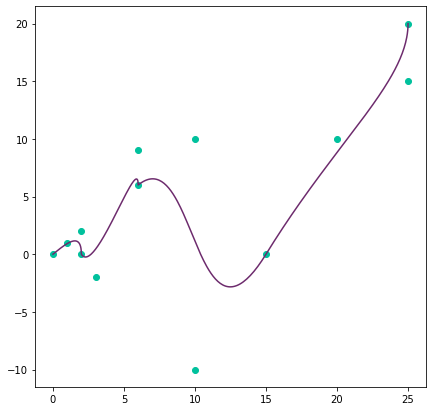

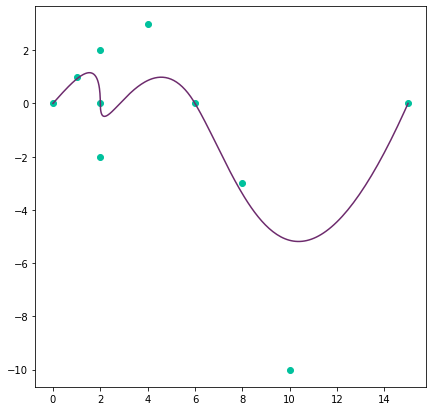

In [171]:
draw_outline_bezier(outline, "a1")
draw_outline_bezier(outline_smooth, "a2")

In [172]:
# Задание 3

k = 0.3
get_bezier_3(k, p2)
P_a = [p2[0]]
P_a.append((1 - k) * p2[0] + k * p2[1])
P_a.append((1 - k) ** 2 * p2[0] + 2 * (1 - k) * k * p2[1] + k**2 * p2[2])
P_a.append(get_bezier_3(k, p2))
P_a = np.array(P_a)
# draw(P_a)
P_b = [get_bezier_3(k, p2)]
P_b.append((1 - k) ** 2 * p2[1] + 2 * (1 - k) * k * p2[2] + k**2 * p2[3])
P_b.append((1 - k) * p2[2] + k * p2[3])
P_b.append(p2[3])
P_b = np.array(P_b)
print(P_a, "\n\n", P_b)
print("\n", p2)

[[0.     0.    ]
 [1.05   0.    ]
 [1.65   0.135 ]
 [2.0295 0.3915]] 

 [[2.0295 0.3915]
 [2.915  0.99  ]
 [2.6    2.25  ]
 [4.     4.    ]]

 [[0.  0. ]
 [3.5 0. ]
 [2.  1.5]
 [4.  4. ]]


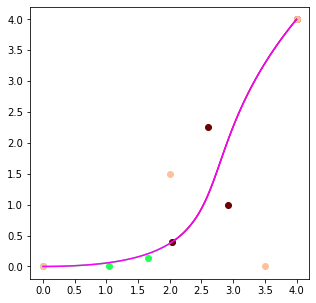

In [175]:
def draw_split():
    fig = plt.figure()
    fig.set_size_inches(5, 5)
    x = P_a[:, 0]
    y = P_a[:, 1]
    plt.scatter(x, y, c="#22ff55")

    bezier = bezier_3(P_a)
    x = bezier[:, 0]
    y = bezier[:, 1]
    plt.plot(x, y, c="#22ff55")

    x = P_b[:, 0]
    y = P_b[:, 1]
    plt.scatter(x, y, c="#6D0000")

    bezier = bezier_3(P_b)
    x = bezier[:, 0]
    y = bezier[:, 1]
    plt.plot(x, y, c="#6D0000")

    x = p2[:, 0]
    y = p2[:, 1]
    plt.scatter(x, y, c="#ffC19D")

    bezier = bezier_3(p2)
    x = bezier[:, 0]
    y = bezier[:, 1]
    plt.plot(x, y, c="#ff00ff")
    fig.savefig("fig")


draw_split()